# Project Obective

The objective of this project is to use a deep learning based model to forecast prices of stocks after 3 days (short term movements) for stocks from Nifty50 index using historical data.


## Our Goals
1. Perform EDA and identify if any patterns exist in the data to build features.
2. Train an LSTM model to predict / forecast stock prices
3. Evaluate accuracy and performance using regression/Time series measures like MAPE


## Steps highlighted in this Model
1. Data Extraction: Using yfinance library to extract OCHLV data for stocks from nift index.

2. Data Loading: Load extracted data in local notebook.

3. EDA: Visualize stock patterns and monitor short term movements, seasonalities, volatility patterns etc.

4. Feature Engineering: New features that are derived from the data to predict stock movements.

5. Model buulding : Use LSTM Architecture and configure various layers.

6. Model training:  Train the LSTM model for each stock.


7. Inference & Evaluation: Visualize results of the model using MAPE for each stock.

8. Plots: Output & Gradeient Descent

9. Conclusion Statement

In [ ]:
#include all imports.
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

### Data Extraction:

Extract data using "yfinance" : https://pypi.org/project/yfinance/



In [ ]:
# Step 1: Get current Nifty 50 stock symbols (you can update this list from NSE/Smart-Investing)
nifty50_symbols = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS',
    'KOTAKBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'ITC.NS', 'LT.NS',
    'AXISBANK.NS', 'MARUTI.NS', 'SUNPHARMA.NS', 'TITAN.NS', 'NESTLEIND.NS', 'HCLTECH.NS',
    'TECHM.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 'NTPC.NS', 'TATAMOTORS.NS',
    'ONGC.NS', 'M&M.NS', 'COALINDIA.NS', 'BAJFINANCE.NS', 'WIPRO.NS', 'JSWSTEEL.NS',
    'NESTLEIND.NS', 'HDFCLIFE.NS', 'DIVISLAB.NS', 'GRASIM.NS', 'HINDALCO.NS',
    'CIPLA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'DRREDDY.NS', 'BRITANNIA.NS',
    'BAJAJFINSV.NS', 'APOLLOHOSP.NS', 'SHRIRAMFIN.NS', 'TATACONSUM.NS',
    'LTIM.NS', 'ADANIENT.NS', 'ADANIPORTS.NS', 'TRIDENT.NS'
]

# Step 2: Define date range (5 years back to current)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print("Downloading Nifty 50 data...")

# Step 3: Create empty dictionary to store data
data = {}

# Step 4: Download adjusted OHLCV data for each stock
for symbol in nifty50_symbols:
    try:
        stock = yf.Ticker(symbol)
        hist = stock.history(start=start_date, end=end_date)


        hist = hist[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
        hist['Adj Close'] = stock.history(start=start_date, end=end_date)['Close']  # yfinance provides adjusted close

        data[symbol] = hist
        print(f"✓ {symbol}: {len(hist)} days")

    except Exception as e:
        print(f"✗ {symbol}: Error - {e}")

# Step 5: Save individual CSV files
output_dir = "nifty50_data"
import os
os.makedirs(output_dir, exist_ok=True)

for symbol, df in data.items():
    filename = f"{output_dir}/{symbol.replace('.NS', '')}.csv"
    df.to_csv(filename)
    print(f"Saved: {filename}")

# Step 6: Create combined DataFrame (optional - all stocks side by side)
combined = pd.DataFrame()
for symbol, df in data.items():
    combined[symbol] = df['Close']

combined.to_csv(f"{output_dir}/nifty50_combined_closes.csv")
print(f"\n✓ Combined data saved: nifty50_combined_closes.csv")
print(f"✓ Total files: {len(data)} stocks")
print(f"✓ Date range: {start_date.date()} to {end_date.date()}")


✓ RELIANCE.NS: 1239 days
✓ TCS.NS: 1239 days
✓ HDFCBANK.NS: 1239 days
✓ INFY.NS: 1239 days
✓ HINDUNILVR.NS: 1239 days
✓ ICICIBANK.NS: 1239 days
✓ KOTAKBANK.NS: 1239 days
✓ SBIN.NS: 1239 days
✓ BHARTIARTL.NS: 1239 days
✓ ASIANPAINT.NS: 1238 days
✓ ITC.NS: 1239 days
✓ LT.NS: 1239 days
✓ AXISBANK.NS: 1239 days
✓ MARUTI.NS: 1238 days
✓ SUNPHARMA.NS: 1239 days
✓ TITAN.NS: 1238 days
✓ NESTLEIND.NS: 1238 days
✓ HCLTECH.NS: 1239 days
✓ TECHM.NS: 1238 days
✓ ULTRACEMCO.NS: 1239 days
✓ POWERGRID.NS: 1239 days
✓ NTPC.NS: 1239 days


ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: TATAMOTORS.NS"}}}
ERROR:yfinance:$TATAMOTORS.NS: possibly delisted; no timezone found
ERROR:yfinance:$TATAMOTORS.NS: possibly delisted; no timezone found


✓ TATAMOTORS.NS: 0 days
✓ ONGC.NS: 1239 days
✓ M&M.NS: 1238 days
✓ COALINDIA.NS: 1239 days
✓ BAJFINANCE.NS: 1239 days
✓ WIPRO.NS: 1239 days
✓ JSWSTEEL.NS: 1238 days
✓ NESTLEIND.NS: 1238 days
✓ HDFCLIFE.NS: 1239 days
✓ DIVISLAB.NS: 1238 days
✓ GRASIM.NS: 1238 days
✓ HINDALCO.NS: 1239 days
✓ CIPLA.NS: 1238 days
✓ EICHERMOT.NS: 1238 days
✓ HEROMOTOCO.NS: 1239 days
✓ DRREDDY.NS: 1239 days
✓ BRITANNIA.NS: 1237 days
✓ BAJAJFINSV.NS: 1238 days
✓ APOLLOHOSP.NS: 1239 days
✓ SHRIRAMFIN.NS: 1238 days
✓ TATACONSUM.NS: 1239 days
✓ LTIM.NS: 1238 days
✓ ADANIENT.NS: 1239 days
✓ ADANIPORTS.NS: 1239 days
✓ TRIDENT.NS: 1239 days
Saved: nifty50_data/RELIANCE.csv
Saved: nifty50_data/TCS.csv
Saved: nifty50_data/HDFCBANK.csv
Saved: nifty50_data/INFY.csv
Saved: nifty50_data/HINDUNILVR.csv
Saved: nifty50_data/ICICIBANK.csv
Saved: nifty50_data/KOTAKBANK.csv
Saved: nifty50_data/SBIN.csv
Saved: nifty50_data/BHARTIARTL.csv
Saved: nifty50_data/ASIANPAINT.csv
Saved: nifty50_data/ITC.csv
Saved: nifty50_data/LT.csv
S

### Data Loading:

The dataset contains daily closing prices of NIFTY-50 stocks over the last
five years. Each column represents a stock and each row represents a trading day.

In [ ]:
# Load combined close prices (created earlier)
data = pd.read_csv(
    "nifty50_data/nifty50_combined_closes.csv",
    parse_dates=['Date'],
    index_col='Date'
)
data.head()

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS,BHARTIARTL.NS,ASIANPAINT.NS,...,DRREDDY.NS,BRITANNIA.NS,BAJAJFINSV.NS,APOLLOHOSP.NS,SHRIRAMFIN.NS,TATACONSUM.NS,LTIM.NS,ADANIENT.NS,ADANIPORTS.NS,TRIDENT.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-18 00:00:00+05:30,899.585022,2832.165771,702.378052,1155.024292,2145.071777,515.656067,367.853210,271.693939,563.089355,2477.351074,...,979.154724,3329.888428,833.584656,2578.994141,214.332260,562.554810,3777.763672,506.619385,500.404816,13.804735
2021-01-19 00:00:00+05:30,914.298828,2866.405518,712.205017,1159.073608,2173.165527,528.519714,375.829895,275.523193,568.221924,2531.765625,...,986.287048,3323.796875,890.411743,2614.823242,224.292938,560.582642,3855.508301,528.815491,517.198242,14.036357
2021-01-20 00:00:00+05:30,931.665222,2908.689453,706.593018,1179.145142,2166.544678,532.920288,375.152679,279.167938,571.915344,2581.730225,...,984.688049,3315.536377,891.818726,2644.772461,227.826172,574.003174,3855.130859,545.425110,542.242737,13.712086
2021-01-21 00:00:00+05:30,951.933533,2877.966064,698.447327,1179.365356,2177.304199,534.564514,370.014191,272.062988,557.717041,2600.012451,...,979.174133,3351.070557,903.247864,2555.074219,220.294022,572.656311,3749.964355,535.599060,531.613403,13.387813
2021-01-22 00:00:00+05:30,929.352783,2903.679443,683.647705,1180.377563,2215.651367,516.284729,364.078979,261.774719,553.400024,2485.438477,...,976.208862,3330.026855,905.063843,2567.774902,210.105148,562.554810,3702.940430,525.523499,520.110352,13.109866


### Explorqtory Data Analysis

We will pick a few stocks to look at the prices and daily return movements to check for short term volatility & long term trends & movements


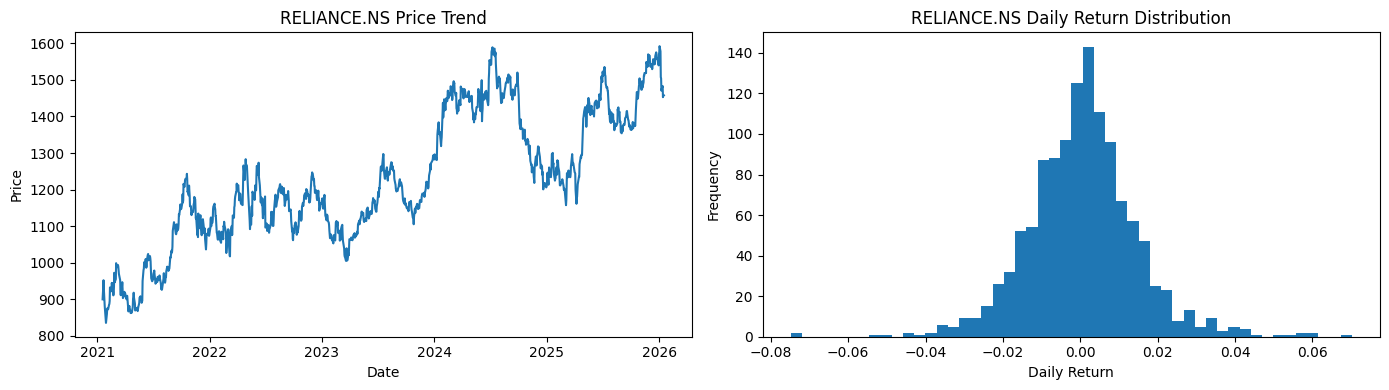

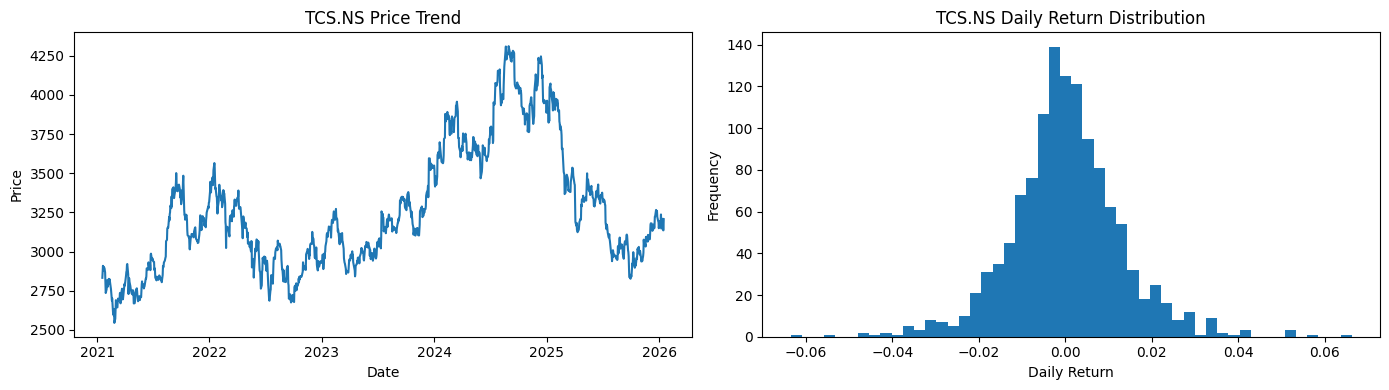

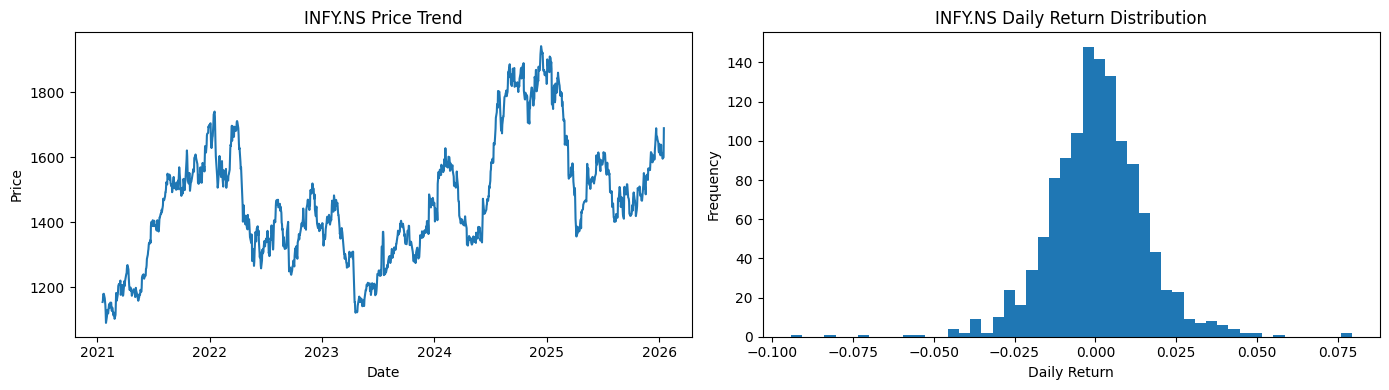

In [ ]:
stocks = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]

import matplotlib.pyplot as plt

for stock in stocks:
    # Create a row with 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # ---- LEFT: Price Trend ----
    axes[0].plot(data.index, data[stock])
    axes[0].set_title(stock + " Price Trend")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Price")

    # ---- RIGHT: Daily Returns ----
    returns = data[stock].pct_change()
    axes[1].hist(returns.dropna(), bins=50)
    axes[1].set_title(stock + " Daily Return Distribution")
    axes[1].set_xlabel("Daily Return")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


##### Few inferences:
1. The price series is non-stationary (mean and variance change over time).
2. Simple models assuming constant mean (like linear regression on price) are not suitable.
3. This justifies the use of sequence-based models like LSTM, which are designed to learn patterns over time.


### Feature Engineering(A) :
Short-term technical features are created to capture recent
price movements and volatility. This function here shows how we are building features

In [ ]:
def create_features(df, close_prices):
    df = pd.DataFrame({"Close": close_prices})

    df["Return_1D"] = df["Close"].pct_change()
    df["Return_3D"] = df["Close"].pct_change(3)

    df["MA_5"] = df["Close"].rolling(5).mean()
    df["Trend_5"] = df["Close"] / df["MA_5"] - 1

    df["Volatility_5"] = df["Return_1D"].rolling(5).std()

    return df.dropna()


### Feature Engineering(B): Preparing LSTM Sequences

LSTM models require sequential input data.
Sliding windows are used to convert time-series data into
supervised learning samples.

In [ ]:
def create_sequences(X, window_size=20):
    sequences = []

    for i in range(window_size, len(X)):
        sequences.append(X[i-window_size:i])

    return np.array(sequences)

### Model Development: LSTM
A simple LSTM architecture is used to model short-term dependencies
in stock prices. The model predicts a single future price value. (T+3)

Learning Rate was chosen as 0.05 for faster convergence


In [ ]:
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.05),
        loss="mse"
    )

    return model


### Model Training:

The LSTM model is trained separately for each stock.

In [16]:
forecast_horizon = 3 #3 days forecast horizon
window_size = 20  #sliding window for lstm
results = {}
for stock in nifty50_symbols:
    print(f"\n===== Training LSTM for {stock} =====")

    # Extract single stock series
    close = data[stock].dropna()

    # Skip very short series
    if len(close) < 200:
        print("Skipped (not enough data)")
        continue

    # Feature engineering (same logic, stock-wise)
    df = pd.DataFrame({'Close': close})
    df['Ret_1D'] = df['Close'].pct_change()
    df['Ret_3D'] = df['Close'].pct_change(3)
    df['MA_5'] = df['Close'].rolling(5).mean()
    df['Trend_5'] = df['Close'] / df['MA_5'] - 1
    df['Vol_5'] = df['Ret_1D'].rolling(5).std()
    df.dropna(inplace=True)

    features = ['Ret_1D', 'Ret_3D', 'Trend_5', 'Vol_5']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Create LSTM sequences
    X_lstm = create_sequences(X_scaled, window_size=window_size)

    y_lstm = df['Close'].shift(-forecast_horizon).values[
        window_size:-forecast_horizon
    ]
    X_lstm = X_lstm[:-forecast_horizon]

    if len(X_lstm) == 0:
        continue

    #Train-test split (CANNOT ASSUME shuffled split as there is temporal dependecy involed here)
    split = int(0.8 * len(X_lstm))
    X_train, X_test = X_lstm[:split], X_lstm[split:]
    y_train, y_test = y_lstm[:split], y_lstm[split:]

    #Build & train model
    model = build_lstm((X_train.shape[1], X_train.shape[2]))

    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    #Evaluate
    preds = model.predict(X_test).flatten()

    mape_value = mean_absolute_percentage_error(y_test, preds)

    results[stock] = {
        "MAPE_t+3": mape_value,
        "Samples": len(X_lstm)
    }



===== Training LSTM for RELIANCE.NS =====
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1293038.5000 - val_loss: 1773410.5000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1148510.0000 - val_loss: 1606122.2500
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1015213.7500 - val_loss: 1453340.5000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 879452.1250 - val_loss: 1314046.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 774944.1250 - val_loss: 1186446.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 688255.1875 - val_loss: 1064043.1250
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 583299.8750 - val_loss: 954258.5625
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 519165.5625 - val_loss: 854937.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 445580.5312 - val_loss: 765561.3750
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 382918.6250 - val_loss: 685482.06

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

===== Training LSTM for INFY.NS =====
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1907103.0000 - val_loss: 2701915.2500
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1751678.8750 - val_loss: 2493168.2500
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1558475.8750 - val_loss: 2295354.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1418036.1250 - val_loss: 2112598.2500
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1256892.5000 - val_loss: 1943793.1250
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1140321.7500 - val_loss: 1787342.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1027530.6875 - val_loss: 1641626.3750
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 918985.2500 - val_loss: 1507337.8750
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 823797.6875 - val_loss: 1383323.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

===== Training LSTM for HINDUNILVR.NS =====
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 5317215.0000 - val_loss: 5905241.5000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5048451.5000 - val_loss: 5629577.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4767188.5000 - val_loss: 5366134.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4526961.0000 - val_loss: 5114008.5000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4327469.5000 - val_loss: 4872330.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4108542.7500 - val_loss: 4639969.5000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3888831.0000 - val_loss: 4416952.5000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3704421.0000 - val_loss: 4202373.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3519221.0000 - val_loss: 3996885.5000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14

### Inference & Evaluation:

Let's  look at the MAPE values to see how far is our predcitions from the actuals

In [17]:
print(results)

{'RELIANCE.NS': {'MAPE_t+3': 0.18052918636805143, 'Samples': 1211}, 'TCS.NS': {'MAPE_t+3': 0.2711700436345256, 'Samples': 1211}, 'HDFCBANK.NS': {'MAPE_t+3': 0.22635887777301034, 'Samples': 1211}, 'INFY.NS': {'MAPE_t+3': 0.0998358183144402, 'Samples': 1211}, 'HINDUNILVR.NS': {'MAPE_t+3': 0.18531026970180253, 'Samples': 1211}, 'ICICIBANK.NS': {'MAPE_t+3': 0.4078834182523381, 'Samples': 1211}, 'KOTAKBANK.NS': {'MAPE_t+3': 0.1263353161582581, 'Samples': 1211}, 'SBIN.NS': {'MAPE_t+3': 0.39398871540261377, 'Samples': 1211}, 'BHARTIARTL.NS': {'MAPE_t+3': 0.5944502519936785, 'Samples': 1211}, 'ASIANPAINT.NS': {'MAPE_t+3': 0.145393628660597, 'Samples': 1210}, 'ITC.NS': {'MAPE_t+3': 0.30135251587529566, 'Samples': 1211}, 'LT.NS': {'MAPE_t+3': 0.5019025742245835, 'Samples': 1211}, 'AXISBANK.NS': {'MAPE_t+3': 0.26537295719212134, 'Samples': 1211}, 'MARUTI.NS': {'MAPE_t+3': 0.7955964863925683, 'Samples': 1210}, 'SUNPHARMA.NS': {'MAPE_t+3': 0.44745587822432087, 'Samples': 1211}, 'TITAN.NS': {'MAPE_t

In [18]:
pd.DataFrame(results)

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS,BHARTIARTL.NS,ASIANPAINT.NS,...,DRREDDY.NS,BRITANNIA.NS,BAJAJFINSV.NS,APOLLOHOSP.NS,SHRIRAMFIN.NS,TATACONSUM.NS,LTIM.NS,ADANIENT.NS,ADANIPORTS.NS,TRIDENT.NS
MAPE_t+3,0.180529,0.27117,0.226359,0.099836,0.18531,0.407883,0.126335,0.393989,0.59445,0.145394,...,0.224921,0.558024,0.262976,0.66894,0.574366,0.274654,0.476259,0.148365,0.409414,0.151094
Samples,1211.000000,1211.00000,1211.000000,1211.000000,1211.00000,1211.000000,1211.000000,1211.000000,1211.00000,1210.000000,...,1211.000000,1209.000000,1210.000000,1211.00000,1210.000000,1211.000000,1210.000000,1211.000000,1211.000000,1211.000000


In [38]:
results_df =pd.DataFrame(results)
results_df_all = results_df.T
results_df_all.to_csv('results_mape_by_stock_all.csv')

,MAPE_t+3,Samples
RELIANCE.NS,0.180529,1211.0
TCS.NS,0.271170,1211.0
HDFCBANK.NS,0.226359,1211.0
INFY.NS,0.099836,1211.0
HINDUNILVR.NS,0.185310,1211.0
ICICIBANK.NS,0.407883,1211.0
KOTAKBANK.NS,0.126335,1211.0
SBIN.NS,0.393989,1211.0
BHARTIARTL.NS,0.594450,1211.0
ASIANPAINT.NS,0.145394,1210.0


In [40]:
avg_mape = results_df_all['MAPE_t+3'].mean()
avg_mape

np.float64(0.37523547627856296)

In [52]:
#identify stocks with mape less than 20
count_low_mape = len(results_df_all[results_df_all['MAPE_t+3'] < 0.2])
count_low_mape

10

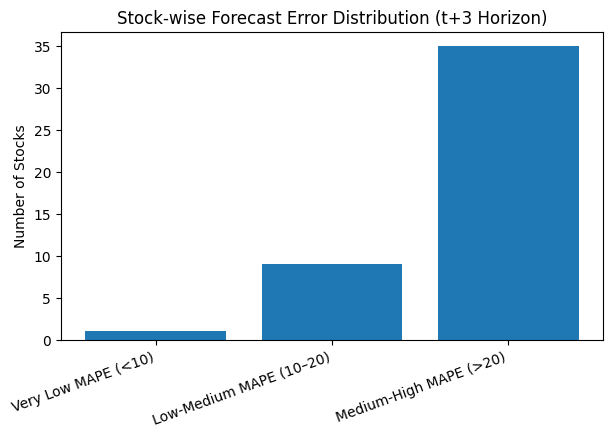

In [48]:
mape_values = results_df_all['MAPE_t+3']
very_low = (mape_values < .10).sum()
low_medium = ((mape_values >= .10) & (mape_values < .20)).sum()
medium_high = (mape_values >= .20).sum()
counts = [very_low, low_medium, medium_high]
labels = ['Very Low MAPE (<10)', 'Low-Medium MAPE (10–20)', 'Medium-High MAPE (>20)']


plt.figure(figsize=(7,4))
plt.bar(labels, counts)
plt.ylabel("Number of Stocks")
plt.title("Stock-wise Forecast Error Distribution (t+3 Horizon)")
plt.xticks(rotation=20, ha='right')   # 👈 this line fixes alignment
plt.show()

# Prediction Plots : Output


In [88]:
# Sort stocks by MAPE (ascending)
best_stocks = results_df_all.sort_values('MAPE_t+3').head(3).index.tolist()

best_stocks = [best_stocks[0]]
best_stocks

['INFY.NS']

Plotting forecasts for: INFY.NS
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


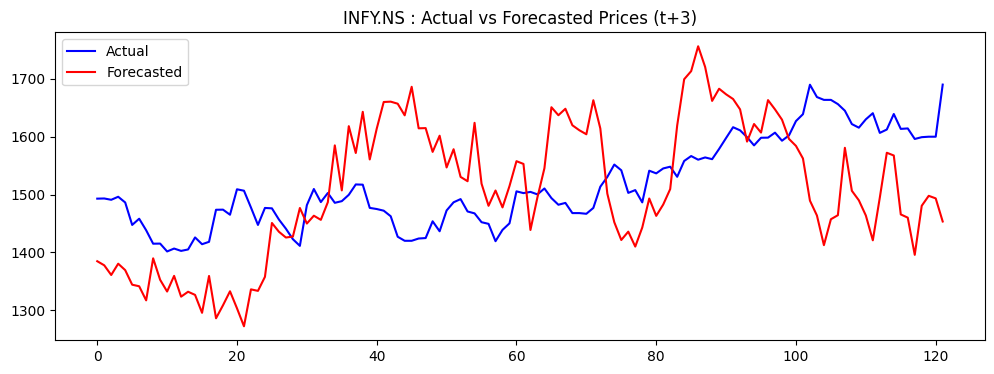

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

WINDOW = 20
HORIZON = 3

for stock in best_stocks:
    print("Plotting forecasts for:", stock)

    # ---- Extract stock prices ----
    close = data[stock].dropna()

    # ---- Feature engineering ----
    df = pd.DataFrame({'Close': close})
    df['Return_1D'] = df['Close'].pct_change()
    df['Return_3D'] = df['Close'].pct_change(3)
    df['MA_5'] = df['Close'].rolling(5).mean()
    df['Trend_5'] = df['Close'] / df['MA_5'] - 1
    df['Vol_5'] = df['Return_1D'].rolling(5).std()
    df = df.dropna()

    features = ['Return_1D', 'Return_3D', 'Trend_5', 'Vol_5']

    # ---- Scale features ----
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])


    # ---- Create LSTM sequences ----
    X_seq = create_sequences(X_scaled, window_size=WINDOW)

    y = df['Close'].shift(-HORIZON).values[WINDOW:-HORIZON]
    X_seq = X_seq[:-HORIZON]

    # ---- Train-test split ----
    y_scaler = MinMaxScaler()

    y_scaled = y.reshape(-1, 1)
    y_scaled = y_scaler.fit_transform(y_scaled).flatten()
    split = int(0.9 * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_scaled[:split], y_scaled[split:]

    # ---- Train model ----
    model = build_lstm((X_train.shape[1], X_train.shape[2]))

    hst = model.fit(
        X_train,
        y_train,
        epochs=30,
        batch_size=32,
        verbose=0
    )

    # # ---- Predict ----
    preds = model.predict(X_test).flatten()


    preds = y_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
    y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

    # ---- Plot Actual vs Forecast ----
    plt.figure(figsize=(12,4))
    plt.plot(y_test_actual, label='Actual', color='blue')
    plt.plot(preds, label='Forecasted', color='red')
    plt.legend()
    plt.title(stock + " : Actual vs Forecasted Prices (t+3)")
    plt.show()


# Prediction Plots : Gradient Descent


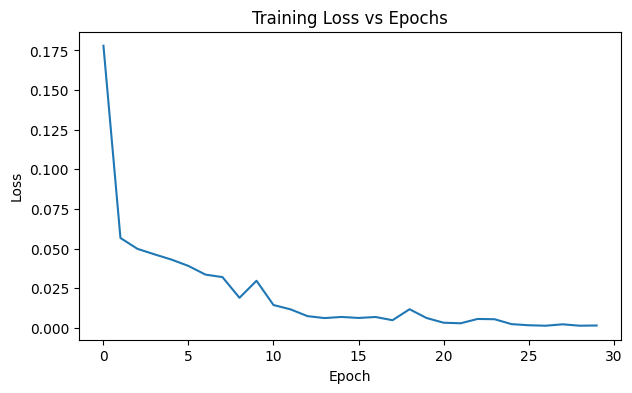

In [90]:
plt.figure(figsize=(7,4))
plt.plot(hst.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()

In [71]:
df_preds = pd.DataFrame({
    'y_test_output': y_test_actual,
    'y_pred_output': preds
})

df_preds.head(10)

,y_test_output,y_pred_output
0,424.920013,436.409515
1,393.320007,431.982941
2,394.540009,423.970490
3,391.940002,402.139252
4,395.720001,386.832092
5,398.480011,334.690063
6,399.399994,332.802063
7,400.600006,338.721985
8,400.480011,359.493774
9,398.420013,371.534271


# Conclusion:

1. We extracted NIFTY-50 stocks data using YAHOO Finance Library. After extraction, it was converted into a singular csv file which captures closing prices daily.

2. Decided to create a target logic of t+3 days prediction, since  objective was to model short term movements in stock market.

3. Opted for an LSTM based model, as it was noticed that there exists increasing mean and variance in our data which creates complexities if we use traditional regression models.

4. We experimented with optimizer, and learning rate and found 0.05 to be good as we were able to reach convergence earlier.

5. As observed, the best gradient was achieved around epoch 30-40, as further below that losses stopped decreasing.

6. Finally, in the test set  MAPE came out to be around 37%  using limited data in our case. But we identified ~45 stocks with MAPE < 20